In [1]:
# change working directory to the root of the project (where jupyter was started)
import os
import psutil
%cd {psutil.Process(os.getpid()).parent().cwd()}

/home/matej/prace/ferda/ferda_github


In [4]:
!git rev-parse HEAD

cb47b74974cf9746c30f2a53e52a32be5db6d278


In [6]:
# !git checkout cb47b74974cf9746c30f2a53e52a32be5db6d278

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
import h5py
from imageio import imread
import numpy as np
import os
from os.path import join
import scripts.CNN.train_interactions as train_interactions
import pandas as pd
import yaml
import warnings
pd.set_option('precision', 2)

In [18]:
DATA_DIR = '/home/matej/prace/ferda/data/interactions/180223_1k_36rot_mask'
EXPERIMENT_DIR = '/home/matej/prace/ferda/experiments/180228_1546_6conv_3dense_mask_batch'
SUB_EXPERIMENT = '0.9285714285714285'

In [21]:
pred = pd.read_csv(join(EXPERIMENT_DIR, str(SUB_EXPERIMENT), 'predictions.csv'))
with open(join(EXPERIMENT_DIR, str(SUB_EXPERIMENT), 'predictions.yaml'), 'r') as fr:
    metadata = yaml.load(fr)
ti = train_interactions.TrainInteractions(metadata['num_objects'])

In [22]:
y_test = pd.read_csv(join(DATA_DIR, 'test.csv'))  
for i in range(ti.num_objects):
    y_test['%d_angle_deg' % i] *= -1

In [23]:
loss_alpha_batch = pd.read_csv(join(EXPERIMENT_DIR, 'results.csv'))    

In [30]:
loss_alpha_batch

,Unnamed: 0,xy MAE,angle MAE,loss_alpha
0,0,2.54,44.73,0.00
1,1,2.51,44.31,0.07
2,2,2.71,43.92,0.14
3,3,2.99,44.14,0.21
4,4,3.27,43.48,0.29
5,5,4.17,44.08,0.36
6,6,3.89,44.02,0.43
7,7,3.83,43.72,0.50
8,8,4.50,43.84,0.57
9,9,4.53,44.02,0.64


In [31]:
# loss_alpha_batch[loss_alpha_batch['loss_alpha'] == float(SUB_EXPERIMENT)]

In [10]:
# loss_alpha_batch.loc[loss_alpha_batch.index[-1], 'xy MAE'] = np.nan
# xy = loss_alpha_batch['xy MAE']
# loss_alpha_batch['xy MAE norm'] = (xy - xy.mean()) / xy.std()
# #loss_alpha_batch['angle MAE'].iloc[0] = np.nan
# angle = loss_alpha_batch['angle MAE']
# loss_alpha_batch['angle MAE norm'] = (angle - angle.mean()) / angle.std()
# loss_alpha_batch['sum norm'] = loss_alpha_batch['angle MAE norm'] + loss_alpha_batch['xy MAE norm']
# loss_alpha_batch['alpha sum norm'] = loss_alpha_batch['angle MAE norm'] * (1 - loss_alpha_batch['loss_alpha']) + \
#                                      loss_alpha_batch['xy MAE norm'] * loss_alpha_batch['loss_alpha']

In [11]:
# ax = loss_alpha_batch.plot('loss_alpha', ['xy MAE norm', 'angle MAE norm', 'alpha sum norm'], 
#                            title='normalized mean absolute errors')
# ax.legend(['xy', 'angle', 'alpha weighted sum'])
# ax.set_xlabel('alpha')

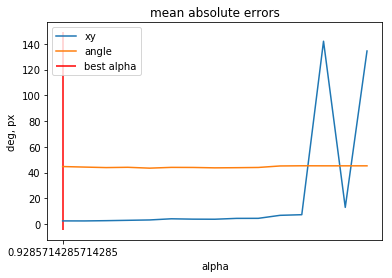

In [29]:
ax = loss_alpha_batch.plot('loss_alpha', ['xy MAE', 'angle MAE'], title='mean absolute errors')
ax.set_ylabel('deg, px')
ax.set_xlabel('alpha')
# ax.set_ylim(0, 24)
ax.vlines(SUB_EXPERIMENT, ax.get_ylim()[0], ax.get_ylim()[1],
          'r')
ax.legend(['xy', 'angle', 'best alpha'])

# Predictions

In [33]:
pred.describe()

,0_x,0_y,0_angle_deg,1_x,1_y,1_angle_deg
count,3600.00,3600.00,3.60e+03,3600.00,3600.00,3.60e+03
mean,102.87,109.79,-9.00e+01,98.08,89.02,8.98e+01
std,0.11,0.04,5.91e-05,0.09,0.08,4.99e-03
min,102.53,109.67,-9.00e+01,97.89,88.86,8.98e+01
25%,102.78,109.76,-9.00e+01,98.00,88.96,8.98e+01
50%,102.87,109.80,-9.00e+01,98.08,89.02,8.98e+01
75%,102.95,109.83,-9.00e+01,98.15,89.08,8.98e+01
max,103.09,109.88,-9.00e+01,98.35,89.26,8.98e+01


In [36]:
pred

,0_x,0_y,0_angle_deg,1_x,1_y,1_angle_deg
0,102.78,109.77,-90.0,98.14,89.08,89.77
1,102.92,109.78,-90.0,98.02,89.02,89.75
2,102.76,109.76,-90.0,98.16,89.09,89.77
3,102.72,109.76,-90.0,98.20,89.12,89.77
4,102.77,109.75,-90.0,98.15,89.10,89.77
5,102.94,109.80,-90.0,98.01,88.99,89.76
6,103.03,109.87,-90.0,97.95,88.89,89.76
7,102.87,109.81,-90.0,98.08,89.00,89.77
8,102.88,109.79,-90.0,98.06,89.02,89.76
9,102.83,109.75,-90.0,98.10,89.08,89.76


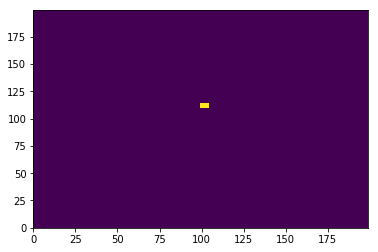

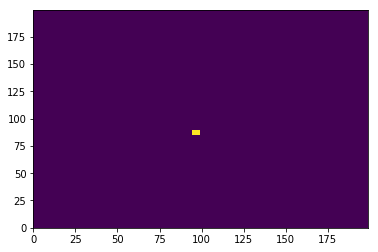

In [35]:
for i in range(n_objects):
    plt.figure()
    _ = plt.hist2d(pred['%d_x' % i], pred['%d_y' % i], bins=40, range=((0, 199), (0, 199)))

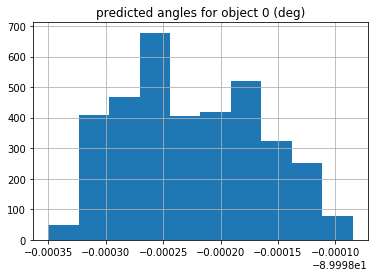

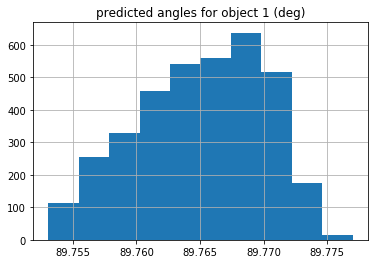

In [37]:
for i in range(n_objects):
    plt.figure()
    plt.title('predicted angles for object %d (deg)' % i)
    (pred['%d_angle_deg' % i]).hist()

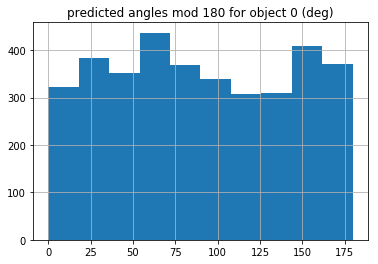

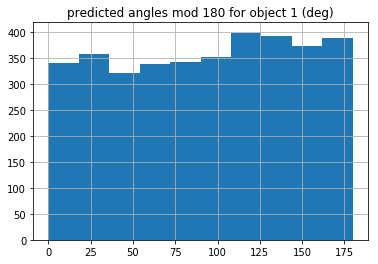

In [17]:
for i in range(n_objects):
    plt.figure()
    plt.title('predicted angles mod 180 for object %d (deg)' % i)
    (pred_df['%d_angle_deg' % i] % 180).hist()

# Prediction Errors

In [18]:
xy, angle, indices = ti.match_pred_to_gt(pred_df[ti.columns()].values, y_test[ti.columns()].values, np)
if n_objects == 1:
    xy_errors = xy
    angle_errors = angle
elif n_objects == 2:
    xy_errors = (xy[indices[:, 0], indices[:, 1]])
    angle_errors = (angle[indices[:, 0], indices[:, 1]])
else:
    assert False, 'not implemented'

In [19]:
df = pd.DataFrame.from_items([('xy (px)', [xy_errors.mean()]), 
                              ('angle (deg)', angle_errors.mean()),])
df.style.set_caption('MAE')
df

,xy (px),angle (deg)
0,6.95,8.38


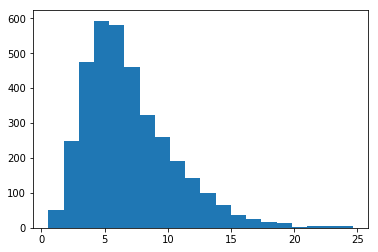

In [20]:
_  = plt.hist(xy_errors, 20)

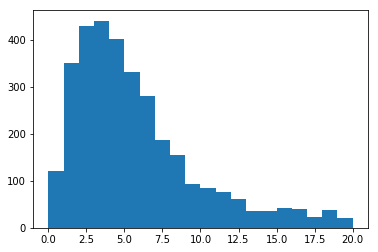

In [27]:
_ = plt.hist(angle_errors, 20, range=(0, 20))

# Model

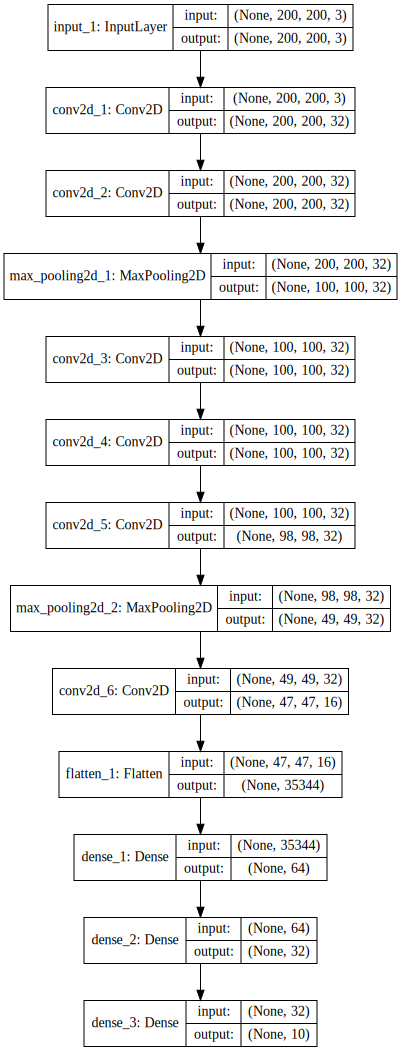

In [24]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(ti.model(), show_shapes=True).create(prog='dot', format='svg'))